In [1]:
from __future__ import division, print_function
from urllib import urlopen, quote
import json
import datetime

In [10]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font',**{'family':'sans-serif','sans-serif':['Tahoma']})
rc('text', usetex=True)
rc(('xtick','ytick','axes'), labelsize=18.0)
rc(('legend'), fontsize=11.0)

In [3]:
import sys
sys.path.append("../.private/")
import apikeys
apikey = apikeys.openweathermap

In [4]:
location = {"_id":6551127,"name":"Dresden, Stadt","country":"DE","coord":{"lon":13.768,"lat":51.076}}

## Current Weather:

In [5]:
#url = "http://api.openweathermap.org/data/2.5/weather?id={}&APPID={}".format(location["_id"],apikey)
url = "http://api.openweathermap.org/data/2.5/weather?lon={}&lat={}&APPID={}".format(\
    location["coord"]["lon"],location["coord"]["lat"],apikey)

In [6]:
request = urlopen(url)
try:
    encoding = request.headers.getparam('charset')
except:
    encoding = request.headers.get_param('charset')
jsonData = request.read().decode(encoding)
data = json.loads(jsonData)

In [7]:
print("Currently {}°C".format(data["main"]["temp"]-273.16))

Currently 25.69°C


## Past weather: 

In [8]:
#current utc unix time:
now = !date -u +%s
now = int(now[0])

frequency="hour"
count = 100

if frequency=="day":
    span = datetime.timedelta(days=count).total_seconds()
elif frequency == "hour":
    span = datetime.timedelta(hours=count).total_seconds()
start = int(now-span)
    
print(now, start, -start + now, span)

#url = "http://api.openweathermap.org/data/2.5/history/city?id={}?type={}&start={}&cnt={}&APPID={}".format(\
#        location["_id"],frequency,start,count,apikey)
url = "http://api.openweathermap.org/data/2.5/history/city?lon={}&lat={}&type={}&start={}&cnt={}&APPID={}".format(\
    location["coord"]["lon"],location["coord"]["lat"],frequency,start,count,apikey)

request = urlopen(url)
try:
    encoding = request.headers.getparam('charset')
except:
    encoding = request.headers.get_param('charset')
jsonData = request.read().decode(encoding)
data = json.loads(jsonData)

1441123477 1440763477 360000 360000.0


<IPython.core.display.Javascript object>


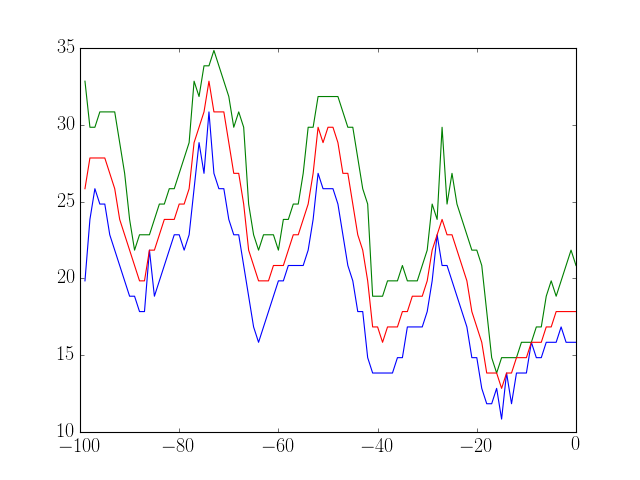

In [9]:
o = 273.16
cleaner_data = data["list"]
counter = [-i for i in range(len(cleaner_data))] 
min = [int(e["main"]["temp_min"])-o for e in cleaner_data]
max = [int(e["main"]["temp_max"])-o for e in cleaner_data]
t = [int(e["main"]["temp"])-o for e in cleaner_data]

plt.plot(counter,min)
plt.plot(counter,max)
plt.plot(counter,t)

In [11]:
from bokeh.plotting import figure, output_file, show

In [12]:
output_file("../openweathermap_timeseries.html")

In [16]:
fig = figure(
   tools="pan,box_zoom,reset",
   y_axis_type="linear", y_range=[5,40],\
    title="OpenWeatherMap time series",\
    x_axis_label="days", y_axis_label="temperature"
)

In [20]:
fig.line(counter, t, legend="y=x^2", line_width=3)
show(fig)